## Library imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img
from keras.utils import img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

## Show the contents of directory

In [2]:
!ls drive/MyDrive/Colab\ Notebooks/Dogs

dog-breed-identification.zip			     models
Dog_build_model.ipynb				     my-dog-photo
dog-vision.ipynb				     preds_array.csv
full_model_predictions_submission_1_mobilenetV2.csv  sample_submission.csv
labels.csv					     test
logs						     train


### Change the directory

In [3]:
%cd drive/MyDrive/Colab\ Notebooks/Dogs

/content/drive/MyDrive/Colab Notebooks/Dogs


In [4]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Dogs'

## Read the labels.csv file and checking shape and records

In [5]:
!ls

dog-breed-identification.zip			     models
Dog_build_model.ipynb				     my-dog-photo
dog-vision.ipynb				     preds_array.csv
full_model_predictions_submission_1_mobilenetV2.csv  sample_submission.csv
labels.csv					     test
logs						     train


In [6]:
labels_all = pd.read_csv("labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# unique dog breeds
len(labels_all['breed'].unique()), labels_all['breed'].unique()


(120,
 array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
        'shetland_sheepdog', 'walker_hound', 'maltese_dog',
        'norfolk_terrier', 'african_hunting_dog',
        'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
        'doberman', 'otterhound', 'standard_schnauzer',
        'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
        'affenpinscher', 'labrador_retriever', 'ibizan_hound',
        'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
        'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
        'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
        'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
        'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
        'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
        'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'pap

In [8]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head(10)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64

In [9]:
# Selecting first 5 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [10]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = load_img('train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 472/472 [01:50<00:00,  4.26it/s]


Train Images shape:  (472, 224, 224, 3)  size: 71,049,216
One-hot encoded output shape:  (472, 5)  size: 2,360


## Building the model

In [11]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

## Create train ,test and validation datasets

In [12]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

## Train the model

In [13]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
3/3 [==============================] - 16s 2s/step - loss: 5.8263 - accuracy: 0.2242 - val_loss: 5.7781 - val_accuracy: 0.2118
Epoch 2/100
3/3 [==============================] - 1s 299ms/step - loss: 5.7916 - accuracy: 0.2330 - val_loss: 5.7464 - val_accuracy: 0.2235
Epoch 3/100
3/3 [==============================] - 1s 306ms/step - loss: 5.7593 - accuracy: 0.2419 - val_loss: 5.7166 - val_accuracy: 0.2471
Epoch 4/100
3/3 [==============================] - 1s 298ms/step - loss: 5.7290 - accuracy: 0.2566 - val_loss: 5.6893 - val_accuracy: 0.2471
Epoch 5/100
3/3 [==============================] - 1s 302ms/step - loss: 5.6972 - accuracy: 0.2625 - val_loss: 5.6586 - val_accuracy: 0.2706
Epoch 6/100
3/3 [==============================] - 1s 297ms/step - loss: 5.6668 - accuracy: 0.2596 - val_loss: 5.6234 - val_accuracy: 0.2588
Epoch 7/100
3/3 [==============================] - 1s 298ms/step - loss: 5.6362 - accuracy: 0.2448 - val_loss: 5.5833 - val_accuracy: 0.2353
Epoch 8/100
3/3

In [14]:
model.save('dog_breed.h5')

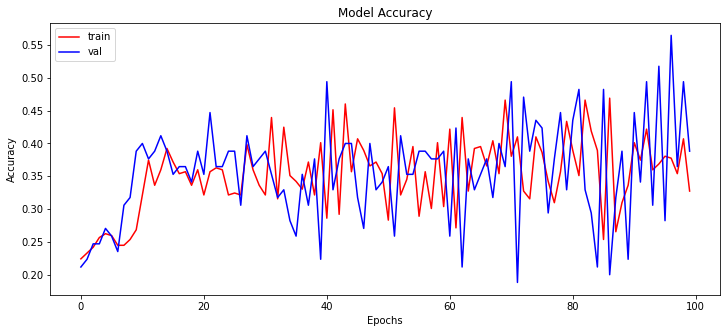

In [15]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [16]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 24ms/step - loss: 30106.2285 - accuracy: 0.3333
Accuracy over the test set: 
  33.33 %


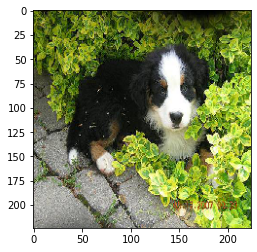

Originally :  scottish_deerhound
Predicted :  entlebucher


In [17]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])